<a href="https://colab.research.google.com/github/sandeeptuluri/Machine-Learning/blob/main/impact_of_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression.

We will start by importing the required libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importing the data.

In [2]:
tweets = pd.read_csv('https://raw.githubusercontent.com/sandeeptuluri/Machine-Learning/main/Twitter.csv')

In [3]:
tweets.head(2)

,Unnamed: 0,Id,Post Contet,Sentiment score,Post Length,Hashtag count,Content URL count,Tweet count,Followers count,Listed Count,Media Type,Published DateTime,Mentions Count,Post author verified,Likes,Shares,Comments,Impact
0,41370,6d967b125fcecba6357dbc43f8f380cf2d6d7a51,Sana all na lang.,0.0,17.0,0.0,0.0,1660.0,133.0,0,TEXT,2021-01-28 12:17:24+00:00,0.0,0.0,0.0,0.0,0.0,0.0
1,27955,22dc5f808a8589186767412f39e5c88ae9753d04,キスマイ玉森裕太「ボス恋」台本の裏話明かす\n\n@TBS_asachan @bosskoi...,19.3,84.0,0.0,1.0,318924.0,1428273.0,5454,TEXT,2021-02-24 06:51:02+00:00,0.0,1.0,10.0,1.0,0.0,110.0


In [4]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            50000 non-null  int64  
 1   Id                    50000 non-null  object 
 2   Post Contet           50000 non-null  object 
 3   Sentiment score       50000 non-null  float64
 4   Post Length           50000 non-null  float64
 5   Hashtag count         50000 non-null  float64
 6   Content URL count     50000 non-null  float64
 7   Tweet count           50000 non-null  float64
 8   Followers count       50000 non-null  float64
 9   Listed Count          50000 non-null  int64  
 10  Media Type            50000 non-null  object 
 11  Published DateTime    50000 non-null  object 
 12  Mentions Count        50000 non-null  float64
 13  Post author verified  50000 non-null  float64
 14  Likes                 50000 non-null  float64
 15  Shares             

The data looks clean and clear.

In [5]:
tweets.describe()

,Unnamed: 0,Sentiment score,Post Length,Hashtag count,Content URL count,Tweet count,Followers count,Listed Count,Mentions Count,Post author verified,Likes,Shares,Comments,Impact
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.0000,50000.000000,50000.000000,50000.000000
mean,14193.578860,1.068916,154.692360,0.687520,0.480260,2.414257e+05,4.648759e+06,10069.683200,0.113720,0.626480,3020.7063,966.773260,16.407920,40038.735600
std,10363.500433,10.436746,79.099411,1.346979,0.526019,1.607467e+06,1.254513e+07,28384.958681,0.512984,0.483743,8261.9454,3117.212706,543.669304,103075.779094
min,0.000000,-20.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
25%,6017.000000,0.000000,94.000000,0.000000,0.000000,1.123775e+04,1.053900e+04,2.000000,0.000000,0.000000,1.0000,0.000000,0.000000,10.000000
50%,12076.500000,0.000000,142.000000,0.000000,0.000000,5.273800e+04,3.551225e+05,555.500000,0.000000,1.000000,153.0000,42.000000,0.000000,2100.000000
75%,20650.250000,0.000000,215.000000,1.000000,1.000000,2.595015e+05,2.809978e+06,6171.000000,0.000000,1.000000,1909.0000,559.000000,0.000000,27500.000000
max,43879.000000,20.000000,373.000000,21.000000,7.000000,5.044408e+07,1.144406e+08,568139.000000,12.000000,1.000000,90919.0000,79671.000000,66939.000000,997980.000000


Exploratory Data Analysis.

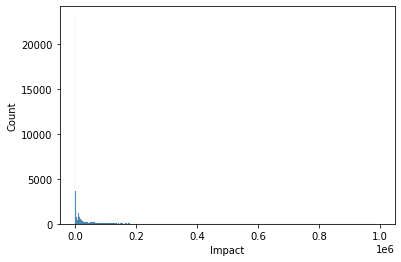

In [6]:
sns.histplot(tweets.Impact)

It seems like very few number of tweets got high impact.

In [7]:
tweets.Impact.max()

997980.0

In [8]:
tweets[tweets.Impact == 997980]['Post Contet'].iloc[0]

'PS5 Global launch schedule: https://t.co/zgwfUX6iVl'

The above tweet got the highest impact from the overall tweets.

Let's check the correlation between in the dataset.

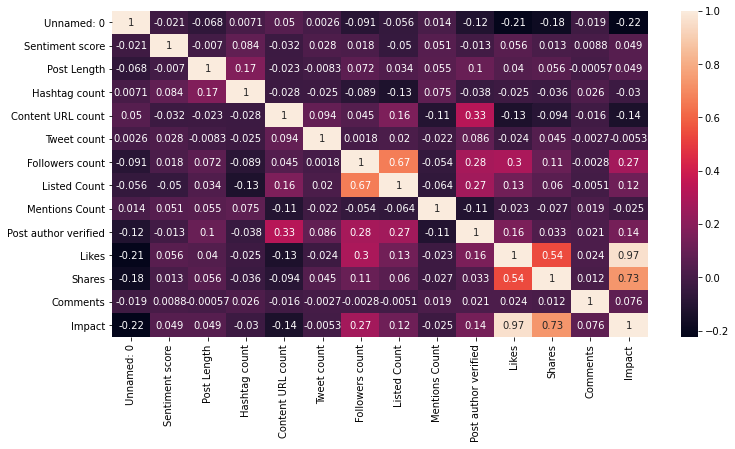

In [9]:
plt.figure(figsize=(12,6))
sns.heatmap(tweets.corr(), annot=True)

From the dataset the most correlated features are 'Content URL count', 'Post author verified', 'Followers Count', 'listed count', 'Likes', 'Impact', 'Shares'.
so we will consider these features for the training the model.

Linear Regression Model.

Train Test Split.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = tweets[['Content URL count','Followers count','Listed Count','Post author verified','Likes', 'Shares']]
y = tweets['Impact']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [13]:
from sklearn.linear_model import LinearRegression

Loading the model and fitting the train data.

In [14]:
linreg = LinearRegression()

In [15]:
model = linreg.fit(X_train,y_train)

In [16]:
from sklearn import metrics

def print_metrics(a, b):
  mae = metrics.mean_absolute_error(a, b)
  mse = metrics.mean_squared_error(a, b)
  rmse = np.sqrt(metrics.mean_squared_error(a,b))
  r_squared = metrics.r2_score(a, b)
  print("MAE", mae)
  print("MSE", mse)
  print("RMSE", rmse)
  print("R2_squared", r_squared)
  print('--------------------------------------')

Printing the metrics.

In [17]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [18]:
print('Training data evaluation:\n----------------------------')
print_metrics(y_train, train_pred)
print('Test data evaluation:\n----------------------------')
print_metrics(y_test, test_pred)

Training data evaluation:
----------------------------
MAE 390.49829714982894
MSE 39866179.92028137
RMSE 6313.967050934093
R2_squared 0.9963284216068522
--------------------------------------
Test data evaluation:
----------------------------
MAE 311.18492577240653
MSE 5359971.045152342
RMSE 2315.1611272549353
R2_squared 0.9994681673873835
--------------------------------------


An R2_squared score of 1.0 indicates that the data perfectly fits the model. here, as our model's R2_squared score of 0.9994 indicates that our data perfectly fits our model.

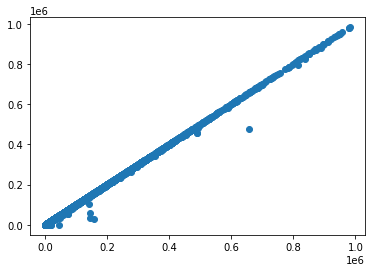

In [19]:
plt.scatter(y_test, test_pred)

Scatter plot also shows the perfect graph and it is highly linear, indicating the best accuracy and best model.

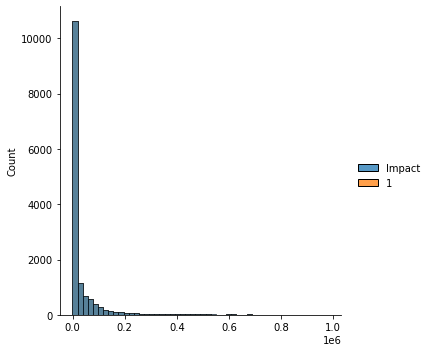

In [20]:
sns.displot((y_test, test_pred), bins = 50)

In [21]:
print(model.intercept_)

76.8176836028506


In [22]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Content URL count,-287.280174
Followers count,-0.000006
Listed Count,-0.000829
Post author verified,399.638523
Likes,10.009965
Shares,10.004375


The coefficient indicates how much the dependent variable increases (if positive), and decreases (if negative), if the independent variable increases by one.
if the post author verified, likes, shares increases by one, the impact of the tweets increases by (399,10,10) times.

----------------------------------------

--------------------------------------------------------------------------

DECISION TREE MODEL.

Importing the model and other required libraries.

In [23]:
from sklearn.tree import DecisionTreeRegressor

In [24]:
sns.set_style('whitegrid')

Training the model.

In [25]:
dtm = DecisionTreeRegressor(max_depth=5, min_samples_split=5, max_leaf_nodes=10)

In [26]:
dtm.fit(X_train,y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=10,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Predicting the model scores.

In [27]:
train_dtm_pred = dtm.predict(X_train)
test_dtm_pred = dtm.predict(X_test)

In [28]:
print('Training data evaluation:\n----------------------------')
print_metrics(y_train, train_dtm_pred)
print('Test data evaluation:\n----------------------------')
print_metrics(y_test, test_dtm_pred)

Training data evaluation:
----------------------------
MAE 9297.597976476207
MSE 543755944.42697
RMSE 23318.575094267017
R2_squared 0.9499213975179979
--------------------------------------
Test data evaluation:
----------------------------
MAE 9125.75120292198
MSE 446548036.65582645
RMSE 21131.68324236918
R2_squared 0.9556921470297507
--------------------------------------



It seems like, data pretty much fits the model, as we are having good R2 score in both data sets.

-------------------------------------------------------------------------------

--------------------------------------------------------------------------------

RANDOM FOREST REGRESSOR.

Importing the required libraries.

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
rf = RandomForestRegressor(n_estimators=1000)

In [31]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [34]:
train_rf_pred = rf.predict(X_train)
test_rf_pred = rf.predict(X_test)

In [35]:
print('Training data evaluation:\n----------------------------')
print_metrics(y_train, train_rf_pred)
print('Test data evaluation:\n----------------------------')
print_metrics(y_test, test_rf_pred)

Training data evaluation:
----------------------------
MAE 214.1747494558196
MSE 4507666.964254432
RMSE 2123.126695290329
R2_squared 0.9995848548152204
--------------------------------------
Test data evaluation:
----------------------------
MAE 489.73985983942964
MSE 13605186.139588151
RMSE 3688.520860668698
R2_squared 0.99865005209379
--------------------------------------


Random Forest Regressor gives the good results of test data as R2_score is 0.998, which means it is a good fit for the model.

--------------------------------------------------------------------------------

------------------------------------------------------------------------------

Artificial Neural Networks

Importing the required libraries.

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [78]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [81]:
model = Sequential()

model.add(Dense(6,activation='relu'))

model.add(Dense(32,activation='relu'))

model.add(Dense(64,activation='relu'))

model.add(Dense(128,activation='relu'))

model.add(Dense(512,activation='relu'))

model.add(Dropout(0.1))

model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.0005),loss='mse')

In [89]:
model.fit(X_train, y_train, validation_data=(X_test,y_test),batch_size=256, epochs=200)

Epoch 1/200
137/137 [==============================] - 2s 10ms/step - loss: 219152048.0000 - val_loss: 9390925.0000
Epoch 2/200
137/137 [==============================] - 1s 8ms/step - loss: 121870304.0000 - val_loss: 14394918.0000
Epoch 3/200
137/137 [==============================] - 1s 9ms/step - loss: 122927328.0000 - val_loss: 516842048.0000
Epoch 4/200
137/137 [==============================] - 1s 9ms/step - loss: 469401344.0000 - val_loss: 2556896256.0000
Epoch 5/200
137/137 [==============================] - 1s 8ms/step - loss: 686001088.0000 - val_loss: 14003909.0000
Epoch 6/200
137/137 [==============================] - 1s 8ms/step - loss: 60609724.0000 - val_loss: 9165858.0000
Epoch 7/200
137/137 [==============================] - 1s 8ms/step - loss: 58404716.0000 - val_loss: 11046266.0000
Epoch 8/200
137/137 [==============================] - 1s 9ms/step - loss: 60447932.0000 - val_loss: 47953696.0000
Epoch 9/200
137/137 [==============================] - 1s 9ms/step - loss

In [90]:
loss = pd.DataFrame(model.history.history)

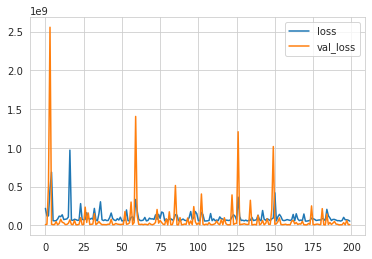

In [91]:
loss.plot()

In [92]:
test_ann_pred = model.predict(X_test)

In [93]:
print('Test data evaluation:\n----------------------------')
print_metrics(y_test, test_ann_pred)

Test data evaluation:
----------------------------
MAE 901.4310343650818
MSE 10827562.999530697
RMSE 3290.5262496340456
R2_squared 0.9989256563011628
--------------------------------------


Artificial neural networks also given best fit with R2_score 0.999, which seems a better model.

Getting the Data Frame of all the results.

In [96]:
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [99]:
df1 = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred)]], columns=['Model','MAE','MSE','RMSE','R2_SCORE'])

In [111]:
df2 = pd.DataFrame(data=[["Decision Tree", *evaluate(y_test, test_dtm_pred)]], columns=['Model','MAE','MSE','RMSE','R2_SCORE'])
df1 = df1.append(df2, ignore_index=True)

In [112]:
df3 = pd.DataFrame(data=[["Random Forest", *evaluate(y_test, test_rf_pred)]], columns=['Model','MAE','MSE','RMSE','R2_SCORE'])
df1 = df1.append(df3, ignore_index=True)

In [113]:
df4 = pd.DataFrame(data=[["Artificial Neural Networks", *evaluate(y_test, test_ann_pred)]], columns=['Model','MAE','MSE','RMSE','R2_SCORE'])
df1 = df1.append(df4, ignore_index=True)

In [115]:
df1.head()

,Model,MAE,MSE,RMSE,R2_SCORE
0,Linear Regression,311.184926,5.359971e+06,2315.161127,0.999468
1,Decision Tree,9125.751203,4.465480e+08,21131.683242,0.955692
2,Random Forest,489.739860,1.360519e+07,3688.520861,0.998650
3,Artificial Neural Networks,901.431034,1.082756e+07,3290.526250,0.998926


Out of all the models the Linear Regression model is the best fit for the data and gives the best results for predicting the impact of the tweets with the features concerned.